In [ ]:

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset for research/heart attack'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset for research/heart attack/heart.csv
/content/drive/MyDrive/Dataset for research/heart attack/o2Saturation.csv


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

#Importing Dataset

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Dataset for research/heart attack/heart.csv")
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We have 303 rows and 14 columns in our dataset. <br>
We can see that the dataset contains numerical variables.

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no missing value in our dataset

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# explotary Data analysis (EDA) 

In [ ]:
dataset.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. Heart Rate',
       'Exercise Induced Angina', 'Previous Peak', 'Slope', 'No. Major Blood Vessels', 'Thal Rate', 'Condition']

In [ ]:
numerical = ['Age','Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
categorical= ['Sex','Chest Pain Type','Fasting Blood Sugar','Resting ECG','Exercise Induced Angina','Slope','No. Major Blood Vessels','Thal Rate']

#Heat map correlation

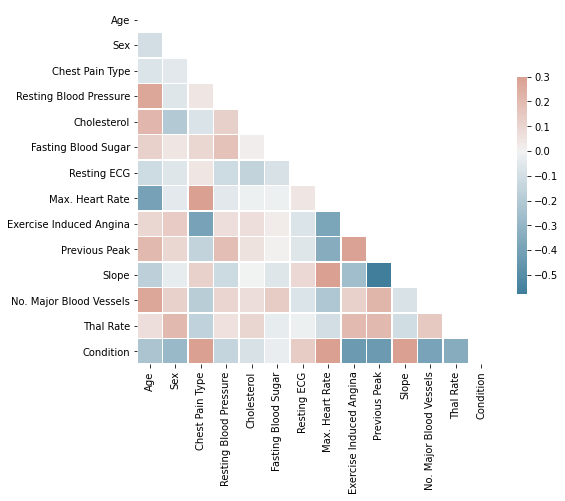

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

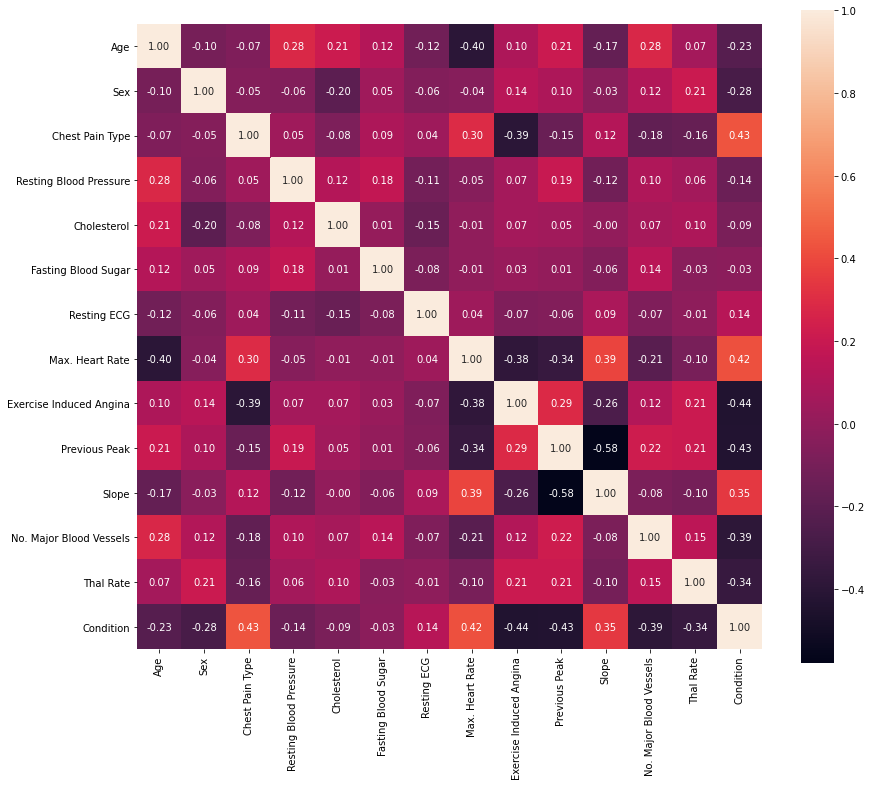

In [ ]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

01.  From the above correlation matrix, we can see that the correlation between features is less. <br>
02. Chest Pain Type with Condition and Max. Heart Rate with Condition have high correlated features in our dataset; Correlation Coefficient of 0.43 and 0.42 respectively. <br>
03. Our features have a lot of negative correlation coefficient indicating that two individual variables have a statistical relationship such that generally move in opposite directions from one another.

#piechart

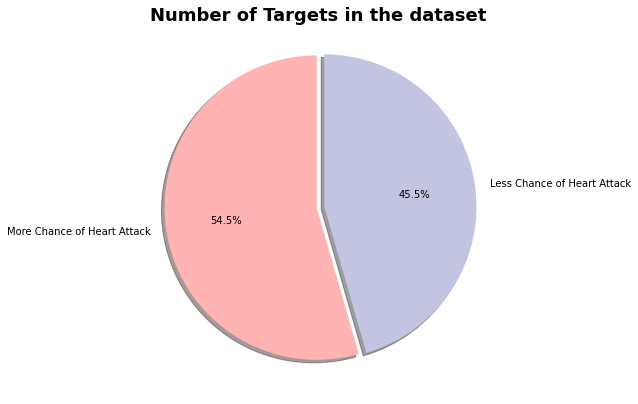

In [ ]:
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = dataset['Condition'].value_counts(sort = True)

colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, family='Sherif', size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

01. From the above pie chart, we can see that we have relatively more people who have more chances of having a Heart Attack. <br>
02.  We can also see that the our dataset is balanced.

#count Plot

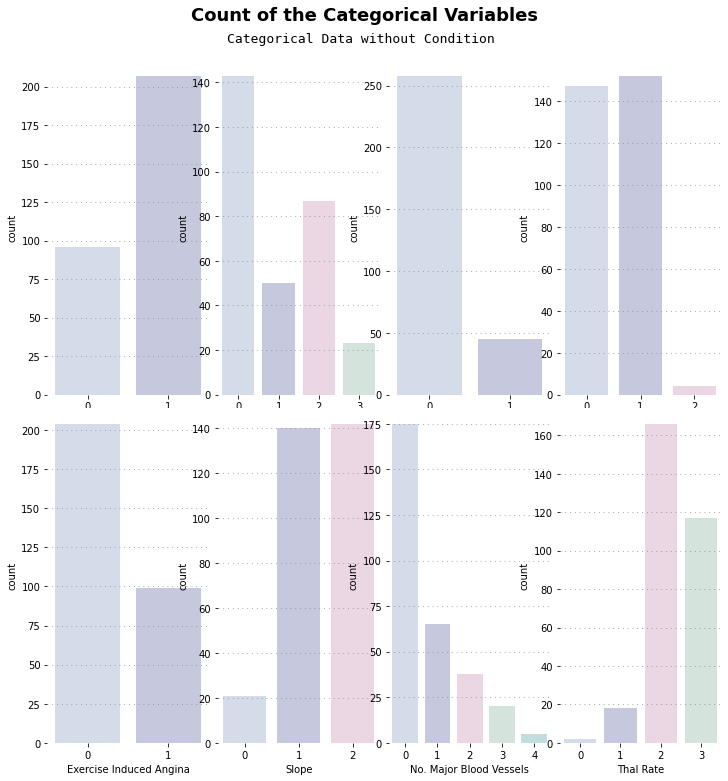

In [ ]:
# Count Plot of Categorical Data w/o Condition
colors = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.31,1.02,"Categorical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax=sns.countplot(data=dataset, x=i, palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

01.  From the above plots, we can see that we have different features which have a common and uncommon type of categories in our dataset.
02.  But, It is not enough to tell us about the features. Let's compare all the categorical features with the target column of Condition.

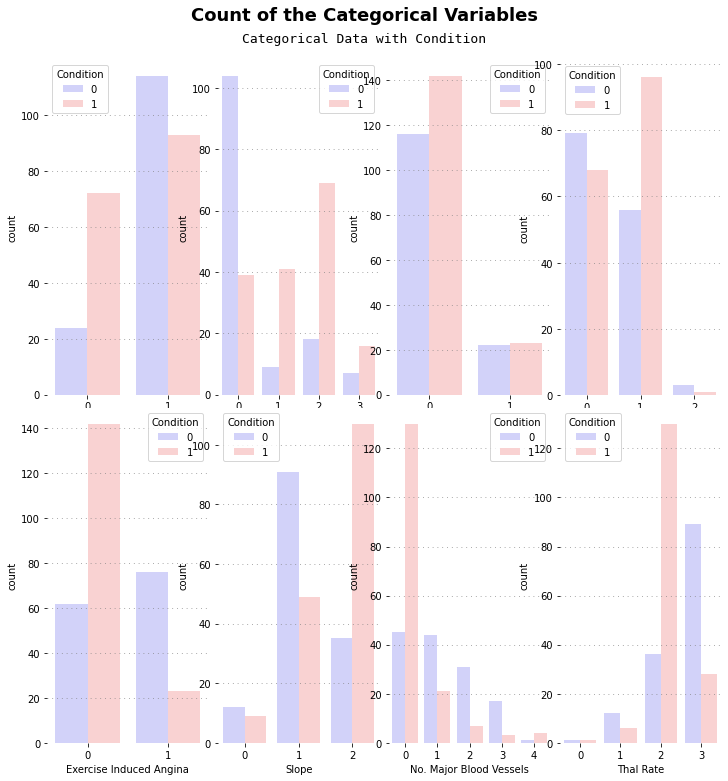

In [ ]:
# Count Plot of Categorical Data with Condition
colors = ['#ccccff','#ffcccc']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.33,1.02,"Categorical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=dataset, x=i, hue='Condition', palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

From above categorical plots we can see that:
01.  In Chest Pain, Type 0 has the highest number of people who have less chance of suffering from a heart attack.
02.  Fasting Blood Sugar and Resting ECG doesn't have much difference in their respective conditions.
03. In Exercise-Induced Angina, Type 0 has the highest number of people who are likely to suffer a heart attack.
04. Slope has Type 2, No. of Major Blood Vessels has Type 0 and Thal Rate has Type 2 which shows people who are likely to suffer from a heart attack.

#distribution plot

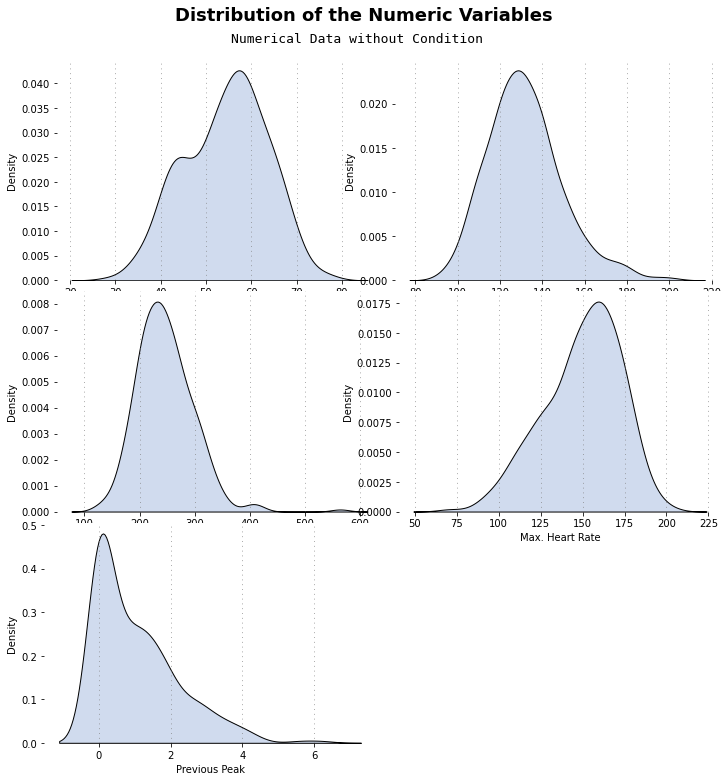

In [ ]:
# Distribution Plot of Numerical Data w/o Condition
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.315,1.02,"Numerical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=dataset, x=i, color='#D0DBEE', fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

01.  From the above plots, we can see that the distribution density of different features them being skew. Let's also compare them with the target column of Condition to see how to perform.

01.  From the above distribution plot, we can see that, Age and Max. Heart Rate is Negative Skewed and Resting Blood Pressure, Cholesterol, and Previous Peak are Positive Skewed.

#Scatter plot

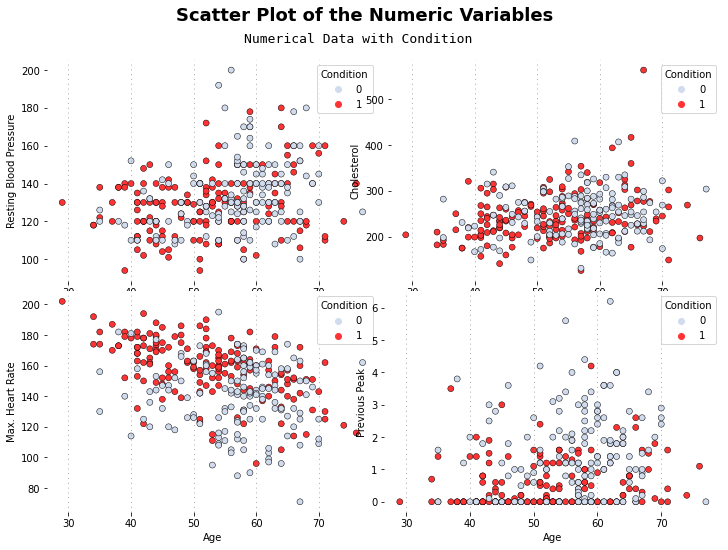

In [ ]:
# Scatter Plot of Numerical Data with Condition
colors = ['#D0DBEE','#ff3333']
num_cols = ['Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Scatter Plot of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[num_cols]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.scatterplot(data=dataset,x=dataset['Age'],y=i,hue=dataset['Condition'],ec='black',palette=colors)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

01.  From the above plot, we can see that the relationship between Age and different numerical features in our dataset with Condition. We can also few Outliers in our plot.

#data Preprocessing